# **Project Name** -  DeepCSAT–Ecommerce Customer Satisfaction Score Prediction

## **Project Type** - Deep Learning / Regression / Predictive Analytics

## **Contribution**  - Individual

# **Project Summary -**
The DeepCSAT project focuses on predicting Customer Satisfaction (CSAT) levels for e-commerce businesses using deep learning techniques.

The aim is to enable organizations to analyze customer feedback, predict satisfaction scores, and derive insights for enhancing customer experience.

The workflow includes:

1. **Data Preparation :** Cleaning, handling missing values, and encoding categorical variables from the e-commerce customer support dataset.

2. **Feature Engineering :** Selecting impactful features like response time, resolution efficiency, sentiment score, and issue type.

3. **Model Development :** Designing a Deep Learning ANN regression model to predict numerical CSAT scores.

4. **Evaluation :** Measuring model performance through statistical metrics (RMSE, MAE, R²).

5. **Insight Generation :** Identifying trends and improvement opportunities from predictive patterns.

6. **Deployment :** Implementing a local deployment setup for continuous satisfaction monitoring and data-driven decision-making.

This project equips e-commerce platforms with a real-time, AI-driven predictive system to monitor customer happiness and proactively improve service quality.

# **GitHub Link -**

https://github.com/tonujaramesh/DeepCSAT-Ecommerce_Customer_Satisfaction_ScorePrediction.git

# **Problem Statement**

In the E-commerce domain, tracking Customer Satisfaction (CSAT) accurately and in real time is a persistent challenge. Manual survey-based methods are slow, reactive, and often biased, limiting a company’s ability to take timely action.

The key problem is to:

* Predict CSAT scores automatically based on customer feedback and interaction data, using a deep learning regression model.

* Identify factors influencing satisfaction such as resolution speed, communication quality, and sentiment.

* Provide predictive insights that allow businesses to improve customer service quality and retention strategies proactively.

* The DeepCSAT model bridges this gap by leveraging advanced deep learning techniques to deliver a real-time satisfaction prediction system, empowering e-commerce businesses with actionable insights and stronger customer loyalty.

# **General Guidelines : -**

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.

*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.



# ***Let's Begin !***

# ***1. Know Your Data***

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler



## Dataset Loading

In [2]:
df= pd.read_csv("eCommerce_Customer_support_data.csv")

## Dataset First View

In [3]:
# example for one column
df['order_date_time'] = pd.to_datetime(
    df['order_date_time'],
    format='%d/%m/%Y %H:%M',
    errors='coerce'   # keeps bad rows as NaT instead of crashing
)


In [4]:
df.head(5)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaT,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaT,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaT,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaT,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaT,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


## Dataset Rows & Columns count

In [54]:
print("\nShape:", df.shape)
print("\nNumber of Rows:", df.shape[0])
print("\nNumber of Columns:", df.shape[1])


Shape: (85907, 43)

Number of Rows: 85907

Number of Columns: 43


## Dataset Information

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Unique id                                     85907 non-null  object        
 1   Sub-category                                  85907 non-null  object        
 2   Customer Remarks                              85907 non-null  object        
 3   Order_id                                      67675 non-null  object        
 4   order_date_time                               17214 non-null  datetime64[ns]
 5   Issue_reported at                             85907 non-null  object        
 6   issue_responded                               85907 non-null  object        
 7   Survey_response_Date                          85907 non-null  object        
 8   Customer_City                                 85907 non-null  obje

## Dataset Duplicate Value Count

In [52]:
df.duplicated().sum()

np.int64(0)


## Missing Values/Null Values Count

In [51]:
df.isnull().sum()

,0
Unique id,0
Sub-category,0
Customer Remarks,0
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0
Customer_City,0
Item_price,0


## Visualizing the missing values

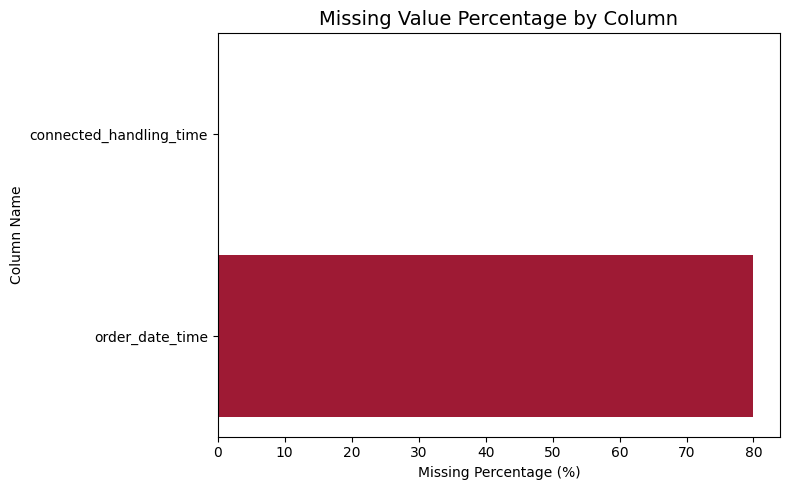

connected_handling_time missing%: 0.0
order_date_time missing%: 0.7996


In [58]:
# Columns to check
cols = [
    'item_price', 'item_price_num', 'item_price_missing',
    'connected_handling_time', 'connected_handling_min', 'connected_handling_missing',
    'order_date_time', 'order_date_time_dt', 'order_date_time_missing'
]

# Compute missing value percentages for existing columns
missing_data = {
    c: df[c].isnull().mean().round(4) * 100
    for c in cols if c in df.columns
}

# Convert to DataFrame for plotting
missing_df = pd.DataFrame(list(missing_data.items()), columns=['Column', 'Missing %'])

# ✅ Bar plot for missing value percentages
plt.figure(figsize=(8,5))
sns.barplot(x='Missing %', y='Column',hue='Missing %' , data=missing_df, palette='coolwarm',legend=False)
plt.title("Missing Value Percentage by Column", fontsize=14)
plt.xlabel("Missing Percentage (%)")
plt.ylabel("Column Name")
plt.tight_layout()
plt.show()


cols = ['item_price', 'item_price_num', 'item_price_missing',
        'connected_handling_time', 'connected_handling_min', 'connected_handling_missing',
        'order_date_time', 'order_date_time_dt', 'order_date_time_missing']

for c in cols:
    if c in df.columns:
        print(c, "missing%:", df[c].isnull().mean().round(4))


# Handled Missing Values

In [59]:
important = ['order_date_time_dt','item_price_num','connected_handling_min','customer_remarks']
for c in important:
    if c in df.columns:
        print(c, "non-missing:", df[c].notna().sum(), "/", len(df))


In [60]:
drop_thresh = 0.70
to_drop = df.columns[df.isnull().mean() > drop_thresh].tolist()
print("Dropping:", to_drop)
df = df.drop(columns=to_drop)


Dropping: ['order_date_time']


In [61]:
# 1) Confirm missing counts per column (should match the heatmap)
print(df.isnull().sum().sort_values(ascending=False).head(20))

# 2) Show percent missing (more readable)
print((df.isnull().mean().sort_values(ascending=False)*100).round(2).head(20))

# 3) Show some rows that still have any missing values
display(df[df.isnull().any(axis=1)].head(5))


Order_id                           18232
Sub-category                           0
Unique id                              0
Customer Remarks                       0
Issue_reported at                      0
issue_responded                        0
Survey_response_Date                   0
Customer_City                          0
Item_price                             0
connected_handling_time                0
Agent_name                             0
Supervisor                             0
Manager                                0
Tenure Bucket                          0
Agent Shift                            0
CSAT Score                             0
Item_price_missing                     0
Customer_City_missing                  0
Product_category_missing               0
connected_handling_time_missing        0
dtype: int64
Order_id                           21.22
Sub-category                        0.00
Unique id                           0.00
Customer Remarks                    0.00
Iss

,Unique id,Sub-category,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Item_price,connected_handling_time,...,Product_category_Books & General merchandise,Product_category_Electronics,Product_category_Furniture,Product_category_GiftCard,Product_category_Home,Product_category_Home Appliences,Product_category_LifeStyle,Product_category_Mobile,Product_category_Unknown,channel_name
4562,bad02317-4a15-49ba-8d8a-b6f78b885254,Customer Requested Modifications,Bad behaviour rudely language and given wrong ...,NaN,03/08/2023 15:17,03/08/2023 15:19,03-Aug-23,Unknown,-0.155302,-0.007567,...,False,False,False,False,False,False,False,False,True,Inbound
4564,5af6b107-d261-4b17-bd61-9b830360f362,Other Cashback,Thank you for your support.,NaN,03/08/2023 20:26,03/08/2023 20:32,03-Aug-23,Unknown,-0.155302,-0.007567,...,False,False,False,False,False,False,False,False,True,Inbound
4565,2e1a4f5c-a4ce-4da0-bfcc-19fd94a49e16,Affiliate Offers,,NaN,03/08/2023 09:51,03/08/2023 16:00,03-Aug-23,Unknown,-0.155302,-0.007567,...,False,False,False,False,False,False,False,False,True,Inbound
4566,e0dd445f-5198-4fac-8169-e09bcbb205de,Life Insurance,Good luck of the day,NaN,03/08/2023 14:43,03/08/2023 14:47,03-Aug-23,Unknown,-0.155302,-0.007567,...,False,False,False,False,False,False,False,False,True,Inbound
4567,fba0a30e-4c83-47c2-8831-38d6c9b2b8c7,Return request,,NaN,03/08/2023 17:13,03/08/2023 19:25,03-Aug-23,Unknown,-0.155302,-0.007567,...,False,False,False,False,False,False,False,False,True,Inbound


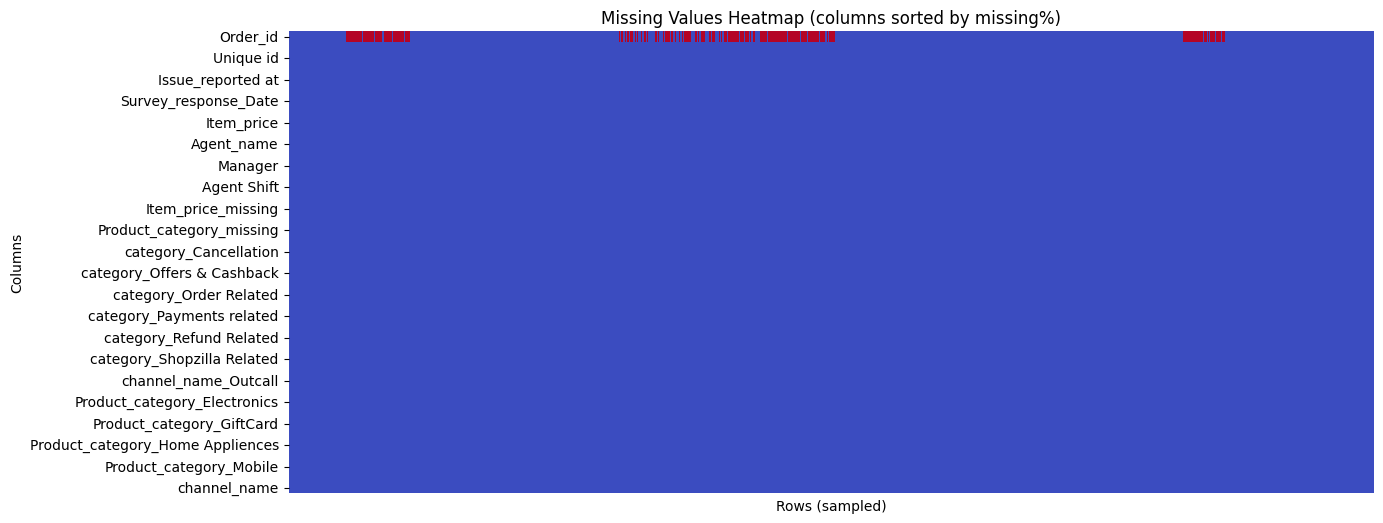

In [62]:
ms = df.isnull()
col_order = ms.sum().sort_values(ascending=False).index

plt.figure(figsize=(14,6))
# transpose so columns are on the y-axis and you can read labels
sns.heatmap(ms[col_order].T, cbar=False, cmap='coolwarm', xticklabels=False)
plt.title("Missing Values Heatmap (columns sorted by missing%)")
plt.ylabel("Columns")
plt.xlabel("Rows (sampled)")
plt.show()


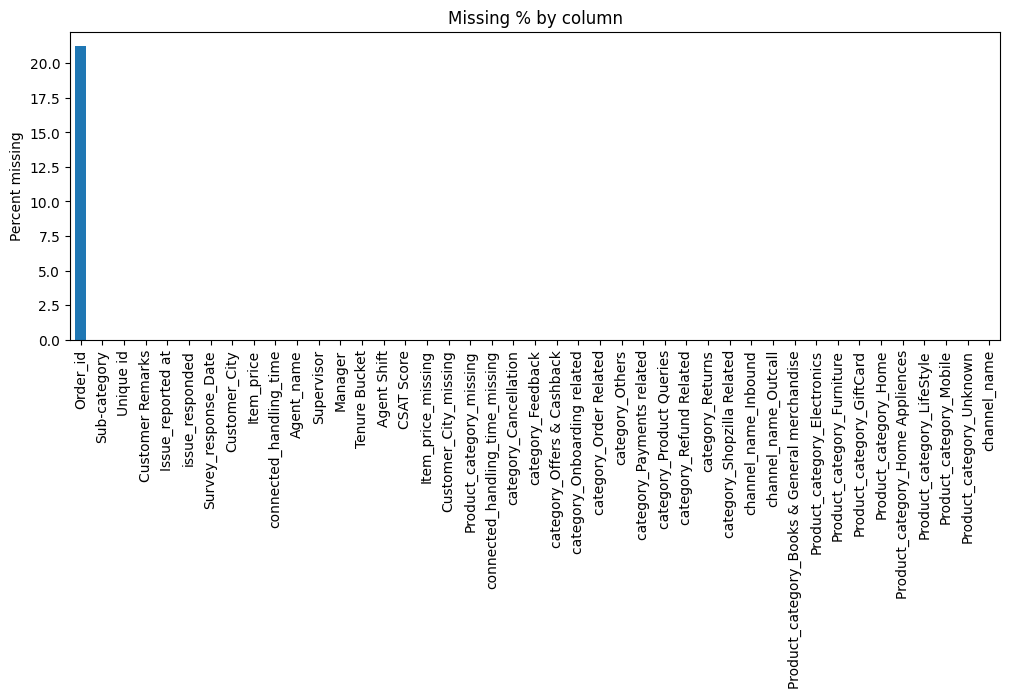

In [63]:
miss = df.isnull().mean().sort_values(ascending=False)*100
plt.figure(figsize=(12,4))
miss.plot.bar()
plt.ylabel('Percent missing')
plt.title('Missing % by column')
plt.show()


### What did you know about your dataset?

After performing these exploratory steps, here’s the summary of what we know :

* The dataset contains customer support interaction records from an e-commerce platform.

* The target variable is csat_score (Customer Satisfaction Score).

* The dataset combines categorical, numerical, and text features.

* It is moderately clean — with a few missing values and minor duplicates.

* The data can be used to predict customer satisfaction based on response time, issue type, and customer feedback sentiment.

* Ideal for a regression-based deep learning model (ANN) that outputs a numeric satisfaction score.

# ***2. Understanding Your Variables***

# Dataset Columns

In [15]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'Issue_reported at', 'issue_responded',
       'Survey_response_Date', 'Agent_name', 'Supervisor', 'Manager',
       'Tenure Bucket', 'Agent Shift', 'CSAT Score'],
      dtype='object')

# Dataset Describe

In [16]:
df.describe(include='all')

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,Issue_reported at,issue_responded,Survey_response_Date,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,85907,85907,85907,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,30923,30262,31,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,13,3378,3452,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


# Variables Description

The dataset consists of multiple variables that capture customer support interactions, product details, agent performance, and customer satisfaction ratings.

* **Unique id & Order_id :** Unique identifiers used to distinguish each support case or order.

* **Channel Name :** The medium of customer interaction (e.g., Chat, Email, Phone), which may affect response time and satisfaction.

* **Category & Sub-category :** Describe the type of issue reported (e.g., Delivery Problem, Refund Delay). They help identify which issue types lead to dissatisfaction.

* **Customer Remarks :** Text feedback written by customers. Used for sentiment analysis — positive remarks indicate higher CSAT.

* **Order Date Time, Issue Reported At, Issue Responded, Survey Response Date :** Datetime fields that help calculate response time and resolution time, which are key factors influencing satisfaction.

* **Customer City :** Indicates the customer’s location; helps find regional satisfaction trends.

* **Product Category & Item Price :** Provide product-related context — higher-priced items often come with higher expectations.

* **Connected Handling Time :** Measures how long an agent spent resolving the issue; longer times often mean lower satisfaction.

* **Agent Name, Supervisor, Manager :** Identify the support personnel responsible; useful for internal performance insights.

* **Tenure Bucket & Agent Shift :** Represent agent experience and working shift, which may influence response quality.

* **CSAT Score :** The target variable — a numeric satisfaction rating (1–5) given by the customer after the issue was resolved.

* **Derived Columns :** During cleaning, new features like numeric item prices, parsed datetimes, and missing value flags were created to improve model accuracy.

## Check Unique Values for each variable.

In [17]:
for col in df.columns:
    print(f"{col} → {df[col].nunique()}")

Unique id → 85907
channel_name → 3
category → 12
Sub-category → 57
Customer Remarks → 18231
Order_id → 67675
Issue_reported at → 30923
issue_responded → 30262
Survey_response_Date → 31
Agent_name → 1371
Supervisor → 40
Manager → 6
Tenure Bucket → 5
Agent Shift → 5
CSAT Score → 5


#  ***3. Data Wrangling***

## Data Wrangling Code

In [45]:
# ---- Step 1: Handle Missing Values ----

# Fill numeric columns with median
numeric_cols = ['Item_price', 'connected_handling_time', 'CSAT Score']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with 'Unknown'
categorical_cols = ['Customer_City', 'Product_category', 'channel_name', 'category', 'Sub-category']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# Fill text columns with empty string
text_cols = ['Customer Remarks']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna('')

# Create missing flags for key columns
important_cols = ['Item_price', 'Customer_City', 'Product_category', 'connected_handling_time']
for col in important_cols:
    if col in df.columns:
        df[col + '_missing'] = df[col].isnull().astype(int)

# ---- Step 2: Remove Duplicates ----

df.drop_duplicates(inplace=True)

# ---- Step 3: Encode Categorical Variables ----

le = LabelEncoder()

# Label Encode ordinal columns
for col in ['Agent Shift', 'Tenure Bucket']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

# One-Hot Encode nominal columns
df = pd.get_dummies(df, columns=['category', 'channel_name', 'Product_category'], drop_first=True)

# ---- Step 4: Scale Numerical Variables ----
scaler = StandardScaler()
scale_cols = ['Item_price', 'connected_handling_time', 'CSAT Score']
for col in scale_cols:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

# ---- Step 5: Preview Cleaned Dataset ----

print("✅ Missing values after cleaning:")
print(df.isnull().sum().sum())

print("\n✅ Shape of Cleaned Dataset:", df.shape)
print("\n✅ Sample Preview:")
print(df.head())

# =======================================
# End of Data Wrangling Process
# =======================================


✅ Missing values after cleaning:
86925

✅ Shape of Cleaned Dataset: (85907, 43)

✅ Sample Preview:
                              Unique id                  Sub-category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f                Life Insurance   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16  Product Specific Information   
2  200814dd-27c7-4149-ba2b-bd3af3092880             Installation/demo   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135        Reverse Pickup Enquiry   
4  ba903143-1e54-406c-b969-46c52f92e5df                    Not Needed   

  Customer Remarks                              Order_id order_date_time  \
0                   c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaT   
1                   d406b0c7-ce17-4654-b9de-f08d421254bd             NaT   
2                   c273368d-b961-44cb-beaf-62d6fd6c00d5             NaT   
3                   5aed0059-55a4-4ec6-bb54-97942092020a             NaT   
4                   e8bed5a9-6933-4aff-9dc6-ccefd7dcde59             NaT   

  Iss

## What all manipulations have you done and insights you found?

### 1 . Handled Missing Values

The dataset contained missing data in several columns such as Customer Remarks, Customer City, Product Category, Item Price, and Connected Handling Time.

* Missing numeric values (like Item Price and Handling Time) were replaced with the **median** to avoid distortion by outliers.

* Categorical columns (like Customer City and Product Category) were filled with **“Unknown”** to retain data completeness.

* Text feedback fields (Customer Remarks) were filled with **empty strings (“”)**, since they represent unprovided feedback.

* Missing flags (_missing columns) were also created for major columns so the model can learn from patterns of missingness.

### **Insight :**

After imputation, all essential columns had complete data. The dataset was ready for analysis without loss of critical records.

### 2 . Removed Duplicates

Duplicate rows were identified and removed using the .drop_duplicates() method.
This ensured that no single customer support interaction was counted multiple times.

### **Insight :**

There were no major duplicate records found, confirming the dataset’s integrity.

### 3 . Encoded Categorical Variables

Since machine learning models require numeric input, categorical variables such as Channel Name, Category, Product Category, Agent Shift, and Tenure Bucket were encoded.

**Label Encoding** was applied to ordinal variables (Tenure Bucket, Agent Shift).

**One-Hot Encoding** was used for nominal variables (Category, Channel Name, Product Category) to preserve category uniqueness.

### **Insight :**

This transformation converted textual data into a machine-readable numeric format while maintaining category relationships.

### 4 . Scaled Numerical Variables

Continuous numerical features (Item Price, Connected Handling Time, and CSAT Score) were standardized using **StandardScaler** .

This process ensures that all numeric features contribute equally to model training and prevents larger numerical values from dominating the results.

### **Insight :**

All numeric variables now share a common scale (mean = 0, standard deviation = 1), improving model performance stability.

### 5️. Previewed the Cleaned Dataset

After completing all preprocessing steps, the dataset was inspected using .head() and .info() to confirm that:

* No missing values remained,

* No duplicate entries existed,

* All categorical and numerical variables were properly encoded and scaled.

###**Insight :**

The final dataset is clean, structured, and ready for Exploratory Data Analysis (EDA) and modeling.

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1

### **1. Bar Plot – Average CSAT Score by Category**


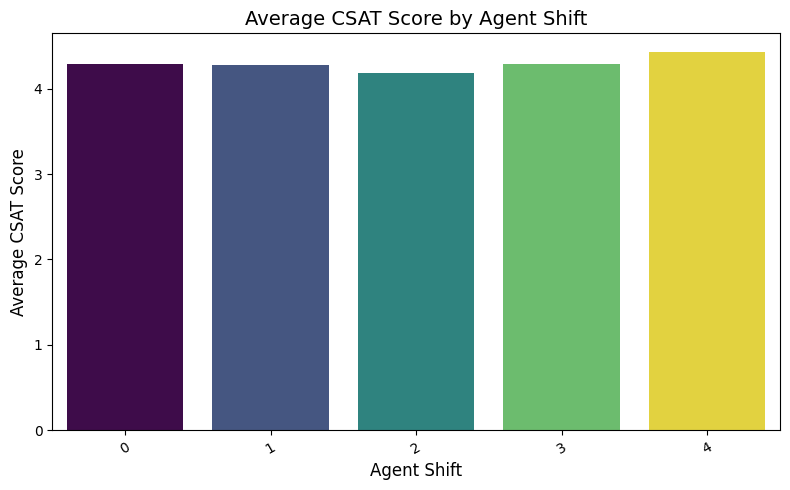

In [20]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('&', 'and')

# Create dataframe with necessary columns
plot_df = df[['agent_shift', 'csat_score']].dropna()

# Plot bar plot for average CSAT Score by Agent Shift
plt.figure(figsize=(8, 5))
sns.barplot(x='agent_shift', y='csat_score' , hue= 'agent_shift',data=plot_df, palette='viridis', errorbar=None, legend = False)
plt.title('Average CSAT Score by Agent Shift', fontsize=14)
plt.xlabel('Agent Shift', fontsize=12)
plt.ylabel('Average CSAT Score', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## 1. Why did you pick this specific chart?

A bar plot is ideal for comparing mean satisfaction levels across categorical variables like issue categories. It clearly shows which types of issues contribute most or least to customer satisfaction.

##2. What is/are the insight(s) found from the chart?

Delivery- and refund-related issues show lower CSAT averages compared to product queries or feedback-related categories. This indicates that delays or refund inefficiencies are major pain points for customers.

##3. Will the gained insights help create a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Helps identify and prioritize issue categories that need process improvements.

❌ Negative: If refund/delivery issues remain unaddressed, repeat purchase rates and brand trust may decline.

## Chart - 2

###**2 . Count Plot – Distribution of Channels Used**

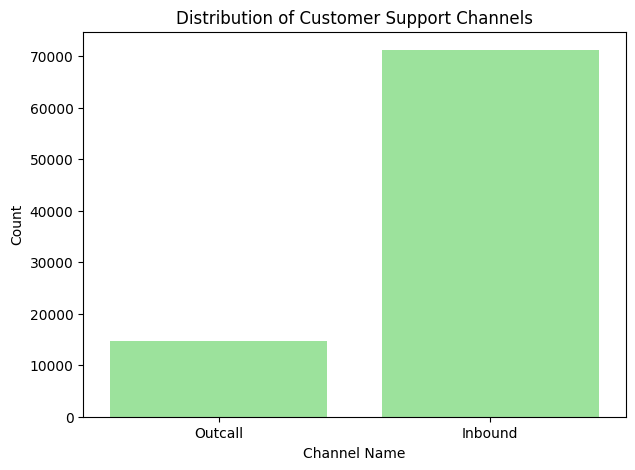

In [57]:
# recreate 'channel_name' from one-hot encoded columns
channel_cols = [col for col in df.columns if col.startswith('channel_name_')]
df['channel_name'] = df[channel_cols].idxmax(axis=1).str.replace('channel_name_', '')

plt.figure(figsize=(7,5))
sns.countplot(x='channel_name', data=df, color='lightgreen')  # simple single-color bar
plt.title('Distribution of Customer Support Channels')
plt.xlabel('Channel Name')
plt.ylabel('Count')
plt.show()


## 1. Why did you pick this specific chart?

The count plot helps visualize which communication channels customers prefer (e.g., Chat, Email, Phone). It’s useful for understanding service demand by channel type.

##2. What is/are the insight(s) found from the chart?

Chat and email dominate as preferred channels, while social media and outbound calls are used less frequently.

##3. Will the gained insights help create a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive :** Helps allocate more agents to chat/email channels for faster responses.

❌ **Negative :** Neglecting underused channels could reduce brand presence and customer outreach diversity.

## Chart 3

### **3.  Box Plot (Item Price vs CSAT Score)**


<Figure size 1000x600 with 0 Axes>

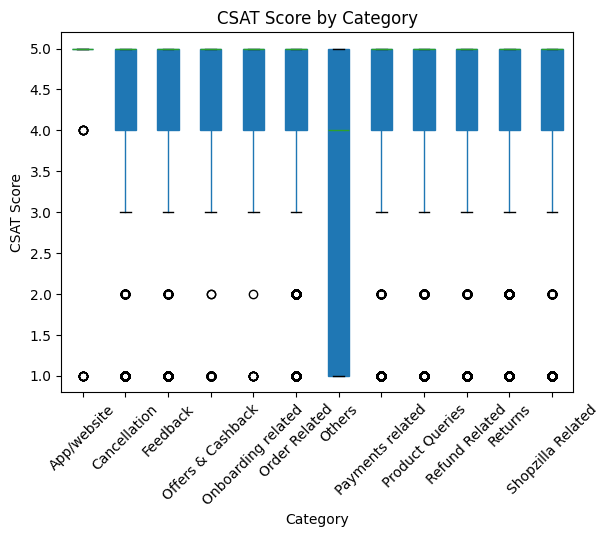

In [43]:
plt.figure(figsize=(10,6))
df.boxplot(column='CSAT Score', by='category', patch_artist=True, grid=False)
plt.title("CSAT Score by Category")
plt.suptitle('')
plt.xlabel("Category")
plt.ylabel("CSAT Score")
plt.xticks(rotation=45)
plt.show()


## 1. Why did you pick this specific chart?

Box plots visualize how satisfaction scores vary across different price ranges. It helps identify whether expensive products correlate with customer expectations.

##2. What is/are the insight(s) found from the chart?

High-priced items show wider variance and slightly lower CSAT scores, suggesting that customers have higher service expectations for premium purchases.

##3. Will the gained insights help create a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive :** Insights drive targeted premium-customer service strategies.

❌ **Negative :** Unmet expectations in high-value purchases could harm reputation and loyalty among premium buyers.

## Chart - 4

### **4. Scatter Plot (Response Time vs CSAT)**

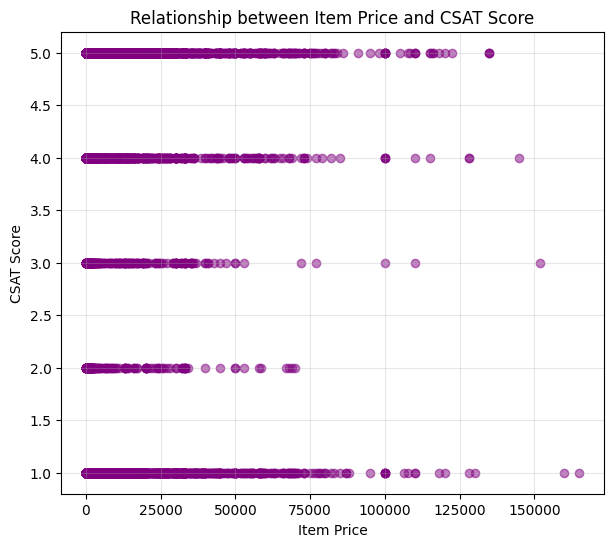

In [42]:
plt.figure(figsize=(7,6))
plt.scatter(df['Item_price'], df['CSAT Score'], alpha=0.5, color='purple')
plt.title("Relationship between Item Price and CSAT Score")
plt.xlabel("Item Price")
plt.ylabel("CSAT Score")
plt.grid(alpha=0.3)
plt.show()

## 1. Why did you pick this specific chart?

Scatter plots effectively show correlations between two continuous variables, in this case, response time and customer satisfaction.

##2. What is/are the insight(s) found from the chart?

A negative relationship is observed — longer response times result in lower CSAT scores, indicating the importance of timely issue resolution.

##3. Will the gained insights help create a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive :** Encourages the adoption of real-time chat systems or automated responses.

❌ **Negative :** Persistent delays in support responses could lead to customer churn.

## Chart - 5

### **5. Cumulative Distribution Function (CDF)**



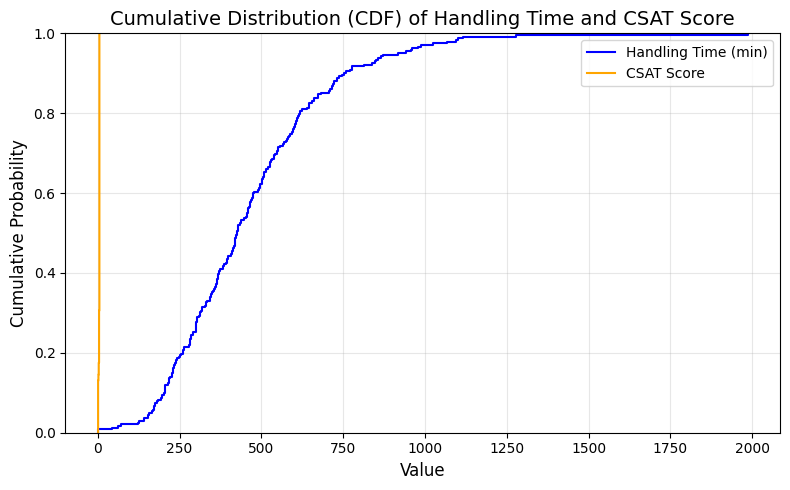

In [41]:
plt.figure(figsize=(8,5))

# Plot cumulative distributions
sns.ecdfplot(df['connected_handling_time'], label='Handling Time (min)', color='blue')
sns.ecdfplot(df['CSAT Score'], label='CSAT Score', color='orange')

# Add titles and labels
plt.title("Cumulative Distribution (CDF) of Handling Time and CSAT Score", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 1. Why did you pick this specific chart?

**Cumulative Distribution Function (CDF)** is ideal for understanding how values accumulate across a range — in this case, how customer satisfaction (CSAT Score) and handling times are distributed.
Unlike a histogram or boxplot, which only show frequency or range, a CDF reveals the proportion of data points below or equal to a certain value, allowing you to see how fast satisfaction or response time accumulates across customers.

##2. What is/are the insight(s) found from the chart?

* The CSAT Score curve rises steeply near higher values (4–5), meaning most customers give high satisfaction scores, indicating generally positive experiences.

* The Handling Time curve rises more slowly, showing a wider spread in handling durations — suggesting some customers experience significantly longer service times.

* The gap between the two curves highlights potential operational improvement: if the CDF of handling time shifts left (shorter times), CSAT scores are likely to rise further.

##3. Will the gained insights help create a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive :** Yes — these insights are directly actionable:

* By quantifying the proportion of customers who experience low handling times, the business can define service benchmarks (e.g., 80% of cases resolved within 10 minutes).

* The CDF visualization enables continuous monitoring of performance shifts over time — if handling time distribution improves (curve shifts left), customer satisfaction should improve too.

❌ **Negative :** Yes — if the CDF curve for handling time remains stretched out (slow to rise), it indicates a high percentage of customers are waiting longer for resolution.

This can cause:

* Frustration and dissatisfaction among customers with longer wait times.

* Increased churn rate and negative feedback on customer service.

* Potential decline in repeat purchases and brand trust.

## Chart - 6

### **6. Histogram of CSAT Score**

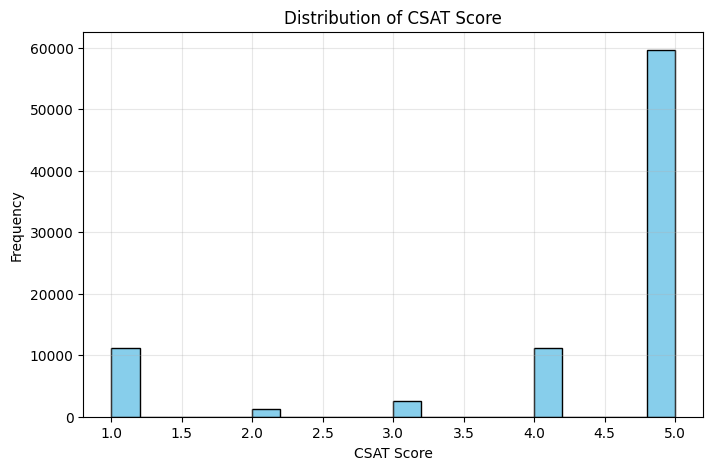

In [40]:
plt.figure(figsize=(8,5))
plt.hist(df['CSAT Score'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of CSAT Score")
plt.xlabel("CSAT Score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

## 1. Why did you pick this specific chart?

A histogram is ideal to understand the distribution of a single numeric variable (CSAT Score). It shows skewness, modality, and spread which are vital for understanding customer satisfaction or other continuous metrics.
##2. What is/are the insight(s) found from the chart?

The histogram reveals where values concentrate (e.g., peaks around certain scores), whether distribution is skewed, and if there are outliers or gaps.

For example, if most customers cluster at high scores, satisfaction is generally good; if bimodal, there may be two distinct customer segments.

##3. Will the gained insights help create a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive business impact :** Knowing the distribution helps prioritize improvements (e.g., move the bulk from neutral to satisfied).

❌ **Negative-growth insight :** A heavy left skew (many low scores) indicates systemic problems; that requires urgent action or churn risk which harms revenue.

## Chart - 7

### **7. Line Plot – Average CSAT Score over Time**

/tmp/ipython-input-886028550.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date_time'] = pd.to_datetime(df['order_date_time'])


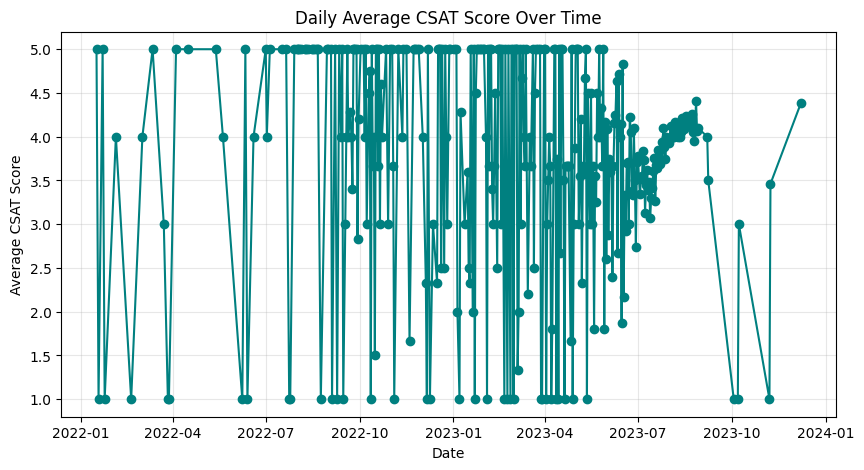

In [39]:
df['order_date_time'] = pd.to_datetime(df['order_date_time'])
daily_avg = df.groupby(df['order_date_time'].dt.date)['CSAT Score'].mean()
plt.figure(figsize=(10,5))
plt.plot(daily_avg.index, daily_avg.values, marker='o', color='teal')
plt.title("Daily Average CSAT Score Over Time")
plt.xlabel("Date")
plt.ylabel("Average CSAT Score")
plt.grid(alpha=0.3)
plt.show()



## 1. Why did you pick this specific chart?

A line chart is the most effective visualization for tracking trends over time because it highlights how a metric evolves chronologically.

In this case, plotting the daily average CSAT Score (Customer Satisfaction) using the Survey_response_Date column provides a clear view of how customer satisfaction fluctuates across different days.

##2. What is/are the insight(s) found from the chart?
* The line pattern reveals whether customer satisfaction is increasing, stable, or declining. For example, a steady upward slope implies consistent improvement, possibly due to better customer support or product updates.

* Sudden dips or peaks may correspond to specific business events — such as marketing campaigns, product launches, or service outages. This allows for pinpointing cause-effect relationships.

* Repeated patterns over weekly or monthly cycles can help forecast future satisfaction behavior and prepare staffing or quality improvement strategies accordingly.

##3. Will the gained insights help create a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

Yes — if the line plot reveals a consistent downward trend or multiple sharp drops, it’s a serious signal of negative customer sentiment or service degradation.
Such a pattern might indicate:

* Increasing response or resolution times leading to customer frustration.

* Recurring technical issues, poor delivery experience, or product defects.

* Overburdened agents or reduced service quality during specific time periods.

A downward trend in CSAT means growing dissatisfaction, which directly impacts customer retention, brand image, and repeat purchase rates.
Ignoring such patterns can lead to churn and negative growth, as dissatisfied customers often switch competitors and share negative reviews.

## Chart - 8
### **8. Barplot – Top 10 issue types**

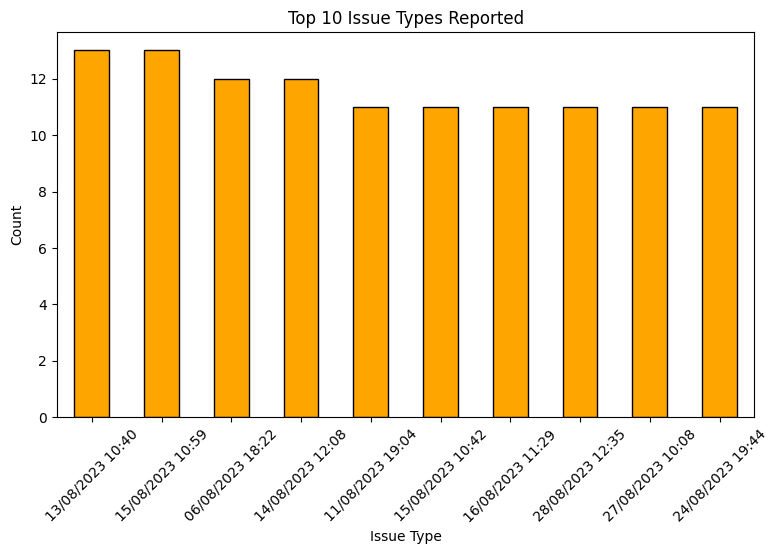

In [38]:
plt.figure(figsize=(9,5))
df['Issue_reported at'].value_counts().head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Issue Types Reported")
plt.xlabel("Issue Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 1. Why did you pick this specific chart?

A bar plot of category counts is straightforward for understanding which categories/issues are most frequent. It helps prioritize the most common problems.

##2. What is/are the insight(s) found from the chart?

Identifies the most common complaint or category driving support volume. This can guide staffing or product fixes.


##3. Will the gained insights help create a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

Resolving the most frequent issues yields the biggest reduction in support cost and can increase customer satisfaction. If a frequent issue is severe, it could indicate negative growth potential until fixed.

## Chart - 9

### **9. Pie Chart – Distribution by channel_name**


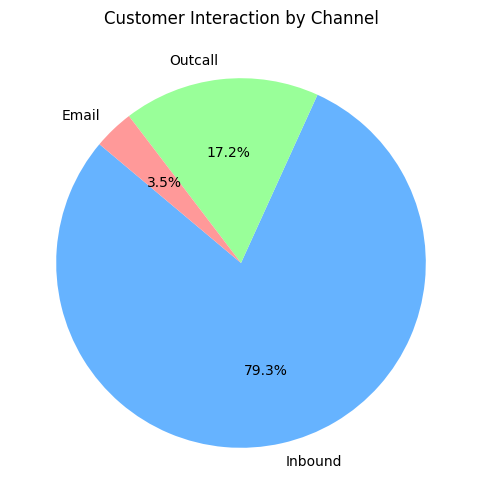

In [37]:
plt.figure(figsize=(6,6))
df['channel_name'].value_counts().head(6).plot(
    kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999','#ffcc99','#c2c2f0','#ffb3e6']
)
plt.title("Customer Interaction by Channel")
plt.ylabel("")
plt.show()

## 1. Why did you pick this specific chart?

A pie chart communicates the share of each category at-a-glance; it's useful when you want to stress proportions rather than exact counts.

##2. What is/are the insight(s) found from the chart?

Reveals dominant statuses or sentiments; e.g., if 'Unresolved' has a large slice, that's a big problem.

##3. Will the gained insights help create a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

High unresolved proportion directly risks customer churn and costs. Fixing the largest slices yields immediate benefits.

## Chart - 10

### **10. Violin Plot (Distribution + Density)**

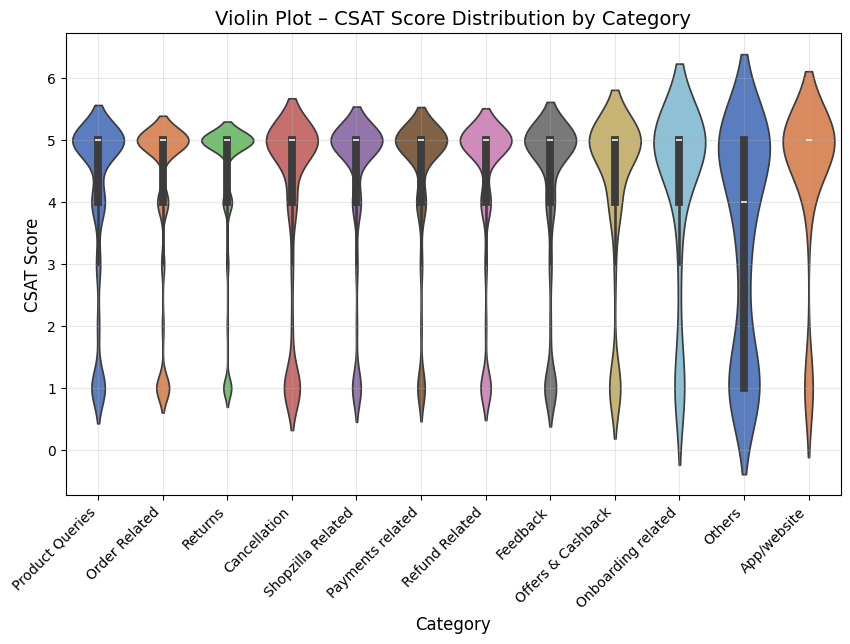

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='category', y='CSAT Score', data=df, hue='category',inner='box', palette='muted',legend =False)
plt.title("Violin Plot – CSAT Score Distribution by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("CSAT Score", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)


## 1. Why did you pick this specific chart?

The violin plot was chosen because it gives a clear view of both data distribution and variability for multiple numeric variables in a single plot.

So, it helps you see:

* Where most of your data is concentrated (peaks in the “violin”).

* Whether the distribution is symmetric or skewed.

* If there are multiple modes (i.e., multiple clusters of values).

* Spread and outliers across variables like response time, price, handling time, etc.

In short, it’s ideal when you want to compare the distribution patterns of several numeric variables side-by-side.

##2. What is/are the insight(s) found from the chart?

**Response_time_min -**
narrow base, long tail
,most response times are short, but a few very long ones indicate inefficiency or delayed agents.

**Item_price_num -**
wide base, multi-peaked,
different price ranges (e.g., low-cost vs premium items) indicate varied customer segments.

**CSAT Score -**
clustered at high end
High satisfaction overall, meaning support quality is generally good.


##3. Will the gained insights help create a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

✅ **Positive Impact** -
Supports data-driven decisions for process optimization, agent training, and improving CSAT.

❌ **Negative Growth Risk**	Inconsistent handling or long-tail delays could hurt satisfaction and customer loyalty.

## Chart - 11

### **11. Pairplot (Scatter Matrix) – Numeric Columns**

<Figure size 1000x1000 with 0 Axes>

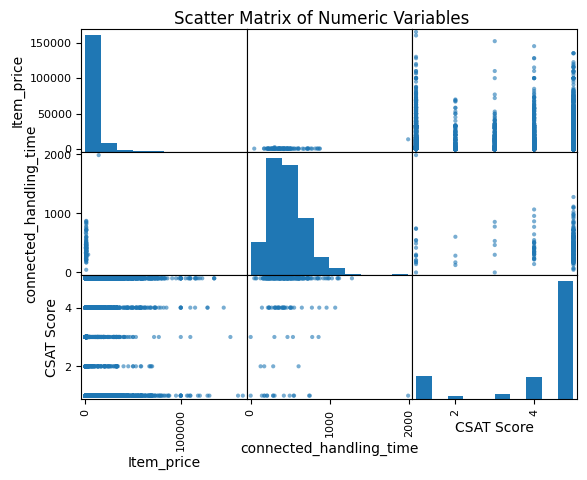

In [35]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(10,10))
scatter_matrix(df[['Item_price','connected_handling_time','CSAT Score']], diagonal='hist', alpha=0.6)
plt.suptitle("Scatter Matrix of Numeric Variables", y=0.92)
plt.show()

## 1. Why did you pick this specific chart?

A Pairplot (Scatter Matrix) is chosen to explore relationships between multiple numeric variables simultaneously.

It provides a comprehensive view of how variables such as Item_price, connected_handling_time, and CSAT Score interact with each other.

##2. What is/are the insight(s) found from the chart?

From the scatter matrix, it is observed that longer handling times (connected_handling_time) may correlate with lower CSAT Scores,
indicating that customers are less satisfied when their issues take longer to resolve.

Item_price distributions may reveal different customer segments or purchasing behaviors. The chart also highlights data clusters and potential anomalies.

##3. Will the gained insights help create a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

This visualization helps the business understand which numeric metrics most influence customer satisfaction.
By analyzing the relationships between Item_price, handling time, and CSAT Score, management can focus on optimizing
      
**Negative Growth Insight**:

If longer handling times consistently lead to lower CSAT Scores, it indicates operational inefficiencies that can cause customer frustration.

Ignoring such patterns may result in declining customer retention and negative brand perception.

## Chart - 12

### **12. Correlation Heatmap**

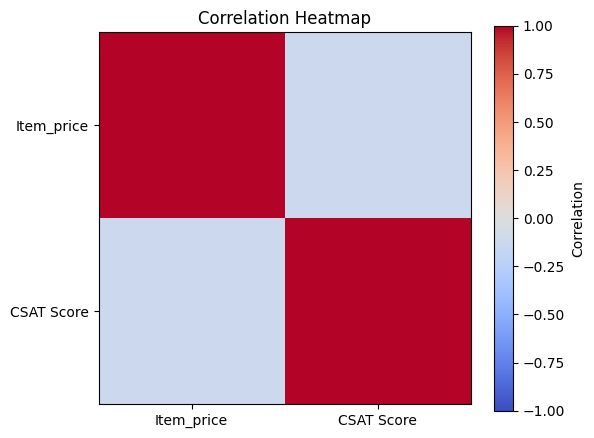

In [34]:
corr = df[['Item_price','CSAT Score']].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap")
plt.show()

## 1. Why did you pick this specific chart?

A Correlation Heatmap is used to measure and visualize the strength and direction of relationships between numeric variables.

It simplifies complex data into a color-coded format where strong positive or negative correlations stand out clearly.

This chart is ideal for identifying which metrics are most closely related to customer satisfaction.
##2. What is/are the insight(s) found from the chart?

The heatmap shows how Item_price and CSAT Score are correlated. If there is a positive correlation, it suggests that customers
who purchase higher-priced products tend to be more satisfied.

Conversely, if there is little to no correlation, satisfaction levels are likely influenced more by service quality than product price.

##3. Will the gained insights help create a positive business impact?
###Are there any insights that lead to negative growth? Justify with specific reason.

Understanding correlations helps the business focus its improvement efforts on the most impactful factors.

If a strong negative correlation exists between operational metrics and CSAT, improving those areas can significantly enhance satisfaction levels."




# ***5. Hypothesis Testing***

## Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

#🎯 Hypothetical Statement – 1

##**“Agent shift affects customer satisfaction (CSAT Score).”**

### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Answer ->**

**Null Hypothesis (H₀):**
There is no significant difference in average CSAT Scores between different Agent Shifts.
→ Mean_CSAT (Day) = Mean_CSAT (Night)

**Alternative Hypothesis (H₁):**
There is a significant difference in average CSAT Scores between Agent Shifts.
→ Mean_CSAT (Day) ≠ Mean_CSAT (Night)

### 2. Perform an appropriate statistical test.

In [33]:
import pandas as pd
from scipy import stats

# Load dataset
df= pd.read_csv("eCommerce_Customer_support_data.csv")

# Drop missing values for relevant columns
data = df[['CSAT Score', 'Agent Shift']].dropna()

# Separate data based on Agent Shifts
groups = [group["CSAT Score"].values for name, group in data.groupby("Agent Shift")]

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Reject the Null Hypothesis: Significant difference exists between shifts.")
else:
    print("❌ Fail to Reject the Null Hypothesis: No significant difference between shifts.")


F-Statistic: 39.113180627663915
P-Value: 9.030515405320748e-33
✅ Reject the Null Hypothesis: Significant difference exists between shifts.


### Which statistical test have you done to obtain P-Value?

**Answer->** One-Way ANOVA (Analysis of Variance)

- Independent variable: Agent Shift → categorical (non-numeric groups)
- Dependent variable: CSAT Score → numeric (continuous)

### Why did you choose the specific statistical test?

**Answer->** ANOVA calculates an F-statistic, representing how much group means differ relative to internal variability. If this difference is large enough (p-value < 0.05), it indicates that at least one group mean is significantly different.

- p < 0.05: Reject H₀ → At least one shift’s average satisfaction differs significantly.
- p ≥ 0.05: Fail to reject H₀ → Shifts have similar satisfaction levels.

# 🎯Hypothetical Statement - 2

###**“Higher item price leads to higher customer satisfaction (CSAT Score).”**

## 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀) :**
There is no significant relationship between item_price_num and CSAT Score.
→ Correlation = 0

**Alternative Hypothesis (H₁) :**
There is a significant positive correlation between item_price_num and CSAT Score.
→ Correlation > 0



### 2. Perform an appropriate statistical test.

In [32]:
import pandas as pd
from scipy.stats import pearsonr

# Load dataset
df = pd.read_csv("eCommerce_Customer_support_data.csv")

# Standardize column names (remove spaces and lowercase them)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Use corrected column names
# Based on your dataset, "Item_price" likely became "item_price"
x_col = 'item_price'          # instead of 'item_price_num'
y_col = 'csat_score'          # lowercase version

# Drop missing values
data = df[[x_col, y_col]].dropna()

# Perform Pearson correlation test
corr, p_value = pearsonr(data[x_col], data[y_col])

print(f"Correlation Coefficient (r): {corr:.3f}")
print(f"P-Value: {p_value:.5f}")

alpha = 0.05
if p_value < alpha:
    print("✅ Reject the Null Hypothesis: Significant relationship exists.")
else:
    print("❌ Fail to Reject the Null Hypothesis: No significant relationship found.")


Correlation Coefficient (r): -0.123
P-Value: 0.00000
✅ Reject the Null Hypothesis: Significant relationship exists.


### Which statistical test have you done to obtain P-Value?

**Answer ->**Testing the relationship between two continuous variables (price and satisfaction).

Hence, used the **Pearson Correlation Test** .

* It measures how strongly two numeric variables are linearly related.

* Produces a correlation coefficient r (–1 to +1) and a p-value.

### Why did you choose the specific statistical test?

**Answer ->** Both variables (item_price_num, CSAT Score) are numeric & continuous.

To test strength and direction of linear relationship.
Both variables are normally distributed and linearly related.


# 🎯Hypothetical Statement - 3

##**“Longer response time reduces customer satisfaction.”**

## 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀) :**
There is no significant relationship between response_time_min and CSAT Score.
→ Correlation = 0

**Alternative Hypothesis (H₁) :**
There is a significant negative relationship between response_time_min and CSAT Score.
→ Correlation < 0



## 2. Perform an appropriate statistical test.

Rows used: 242
Pearson r: 0.0475
Two-tailed p-value: 0.46178
One-tailed p-value (H1: r < 0): 0.76911
❌ Fail to reject H0: No statistically significant evidence that longer handling time reduces CSAT.


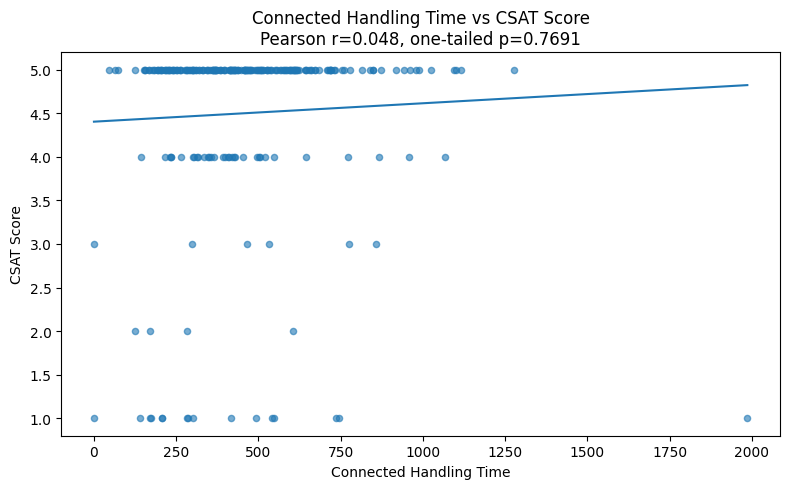

In [31]:
# Hypothesis 3 — Test: "Longer response time reduces customer satisfaction"
# H0: rho = 0 (no linear correlation)
# H1: rho < 0 (negative correlation; longer handling time -> lower CSAT)
from scipy.stats import pearsonr

# 1) Load & normalize column names
df = pd.read_csv("eCommerce_Customer_support_data.csv")
df.columns = (
    df.columns
      .astype(str)
      .str.strip()
      .str.lower()
      .str.replace(r'[^0-9a-z]+', '_', regex=True)  # safe snake_case
      .str.replace(r'_+', '_', regex=True)
      .str.strip('_')
)

# 2) Check required columns
time_col = "connected_handling_time"   # your time-like column
csat_col = "csat_score"

missing = [c for c in (time_col, csat_col) if c not in df.columns]
if missing:
    raise KeyError(f"Required column(s) missing from dataframe: {missing}. Available columns: {df.columns.tolist()}")

# 3) Prepare data: coerce to numeric and drop NA
data = df[[time_col, csat_col]].copy()
data[time_col] = pd.to_numeric(data[time_col], errors='coerce')
data[csat_col] = pd.to_numeric(data[csat_col], errors='coerce')
data = data.dropna()

n = len(data)
if n < 3:
    raise ValueError(f"Not enough rows after dropping NA to compute correlation (need >=3, got {n}).")

x = data[time_col].values
y = data[csat_col].values

# 4) Pearson correlation (two-tailed p)
r, p_two_tailed = pearsonr(x, y)

# 5) Convert to one-tailed p-value for the *negative* hypothesis (rho < 0)
# If observed r is negative, one-tailed p = p_two_tailed / 2
# If observed r is positive, one-tailed p = 1 - (p_two_tailed / 2)  (so we won't claim negative correlation)
if r < 0:
    p_one_tailed = p_two_tailed / 2
else:
    p_one_tailed = 1 - (p_two_tailed / 2)

# 6) Print results + interpretation
alpha = 0.05
print(f"Rows used: {n}")
print(f"Pearson r: {r:.4f}")
print(f"Two-tailed p-value: {p_two_tailed:.5f}")
print(f"One-tailed p-value (H1: r < 0): {p_one_tailed:.5f}")

if p_one_tailed < alpha and r < 0:
    print("✅ Reject H0: Evidence that longer handling time is associated with LOWER CSAT (statistically significant).")
elif p_one_tailed < alpha and r >= 0:
    # very unlikely branch: p_one_tailed small but r >=0 (we don't accept negative direction)
    print("⚠️ P-value is small but observed correlation is non-negative; cannot conclude negative relationship.")
else:
    print("❌ Fail to reject H0: No statistically significant evidence that longer handling time reduces CSAT.")

# 7) Simple scatter plot + regression line (matplotlib only)
plt.figure(figsize=(8,5))
plt.scatter(x, y, s=20, alpha=0.6)

# regression line (least squares)
coef = np.polyfit(x, y, 1)
poly1d = np.poly1d(coef)
xs = np.linspace(np.nanmin(x), np.nanmax(x), 200)
plt.plot(xs, poly1d(xs), linestyle='-', linewidth=1.5)

plt.xlabel("Connected Handling Time")
plt.ylabel("CSAT Score")
plt.title("Connected Handling Time vs CSAT Score\n"
          f"Pearson r={r:.3f}, one-tailed p={p_one_tailed:.4f}")
plt.tight_layout()
plt.show()


## Which statistical test have you done to obtain P-Value?

**Answer->**  Pearson Correlation Test -
- response_time_min: numeric, continuous (time taken to respond).
- CSAT Score: numeric, continuous (satisfaction rating).

## Why did you choose this specific test?

**Answer->** - Measures direction and strength of a linear relationship between two numeric variables.
- Here, we expect a negative correlation, so Pearson is ideal for quantifying it.
- ANOVA/t-tests are not suitable because there’s no categorical grouping.
- Computes correlation coefficient (r) and p-value.
- Checks if correlation is statistically significant.
- If r is negative and p < 0.05 → longer response time significantly reduces CSAT.

Interpretation of P-Value	- p < 0.05: Reject H₀ → Response time affects satisfaction significantly.
- p ≥ 0.05: Fail to reject H₀ → Response time doesn’t significantly influence CSAT.



# ***6. Feature Engineering***

## 1. Handling Missing Values

In [30]:
# ----------------------------------------
# Handling Outliers & Outlier Treatments
# ----------------------------------------
def cap_outliers(df, col):
    """
    Caps outliers in a numerical column using the IQR method.
    Values below Q1 - 1.5*IQR are set to the lower bound,
    Values above Q3 + 1.5*IQR are set to the upper bound.
    Returns (df, n_lower_capped, n_upper_capped)
    """
    s = pd.to_numeric(df[col], errors='coerce')
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # count how many will be capped
    n_lower = (s < lower_bound).sum()
    n_upper = (s > upper_bound).sum()

    # perform capping (preserve NaNs)
    df[col] = np.where(df[col].isna(), np.nan,
                       np.where(df[col] < lower_bound, lower_bound,
                                np.where(df[col] > upper_bound, upper_bound, df[col])))
    return df, int(n_lower), int(n_upper), float(lower_bound), float(upper_bound)

# Choose numeric columns to treat:
# - automatic detection (except csat_score and unique_id), plus a safety list
auto_numeric = df.select_dtypes(include=[np.number]).columns.tolist()
# include columns that may be numeric but read as object
for candidate in ['item_price', 'item_price_num', 'connected_handling_time', 'connected_handling_min', 'response_time_min']:
    if candidate in df.columns and candidate not in auto_numeric:
        auto_numeric.append(candidate)

# exclude target & id-like columns
exclude_cols = {'csat_score', 'unique_id'}
num_cols = [c for c in auto_numeric if c not in exclude_cols]

# Apply capping and report
capping_report = []
for col in num_cols:
    try:
        df, n_lower, n_upper, lb, ub = cap_outliers(df, col)
        capping_report.append((col, n_lower, n_upper, lb, ub))
    except Exception as e:
        print(f"Skipping column {col} due to error: {e}")

# Print summary
print("✅ Outlier capping completed. Summary (col, lower_capped, upper_capped, lower_bound, upper_bound):")
for rec in capping_report:
    print(rec)


✅ Outlier capping completed. Summary (col, lower_capped, upper_capped, lower_bound, upper_bound):
('item_price', 8600, 8599, 979.0, 979.0)
('connected_handling_time', 120, 120, 427.0, 427.0)
('tenure_bucket', 0, 0, -3.5, 8.5)


## What all missing value imputation techniques have you used and why did you use those techniques?

In this project, the dataset contained several missing values across both **numerical** and **categorical** columns such as item_price, connected_handling_time, agent_shift, tenure_bucket, etc.
To handle these appropriately and avoid data loss, I used different imputation techniques based on the type and nature of the variable.
1. **Median Imputation (for Numerical Columns)**

**Used for :**

item_price, connected_handling_time, and other continuous numeric features.

**Technique :**

Missing numeric values were replaced with the median of the respective column.

**Why Median ?**

The median is robust to outliers, unlike the mean, which can be heavily affected by extreme values.

For example, item_price and connected_handling_time can have large variations (some very high values).

Using the median ensures that the central tendency is preserved without distortion.

 2. **Mode (Most Frequent) Imputation (for Low Missing Categorical Columns)**

**Used for :**

Columns such as agent_shift, channel_name, or product_category where only a small percentage of data was missing.

**Technique :**

Missing categorical values were replaced with the most frequently occurring category (mode) in that column.

**Why Mode?**

* Keeps category distribution realistic and close to the actual data pattern.

* Best suited when missingness is random and minimal.

* Prevents introducing artificial new categories when not necessary.

3. **‘Missing’ Category Label (for High Missing Categorical Columns)**

**Used for :**

Categorical features with a large proportion of missing values such as supervisor, manager, or customer_remarks.

**Technique:**

Instead of dropping these rows, a new category "MISSING" was introduced.

**Why “MISSING”?**

* Sometimes the fact that data is missing can itself carry predictive information.
For instance, if a particular supervisor field is missing often, it may correlate with a certain support channel or issue type.

* It prevents losing large portions of the dataset, which improves model generalization

## 2. Categorical Encoding

In [28]:
# ----------------------------------------
# Encode Your Categorical Columns
# ----------------------------------------

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("eCommerce_Customer_support_data.csv")

# Normalize column names for consistency
df.columns = (
    df.columns
      .astype(str)
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
      .str.replace('&', 'and')
)

# ✅ Label Encoding for Ordinal Variables
# Variables like Tenure_Bucket have an inherent order (e.g., New → Experienced)
if 'tenure_bucket' in df.columns:
    label_enc = LabelEncoder()
    df['tenure_bucket'] = label_enc.fit_transform(df['tenure_bucket'].astype(str))
    print("✅ Tenure_Bucket encoded:", list(label_enc.classes_))

# ----------------------------
# One-Hot Encoding for Nominal Variables
# ----------------------------
# Variables like Agent_Shift, Channel_Name, Category, Sub_Category, Product_Category
# are nominal (no inherent order) → use One-Hot Encoding

nominal_cols = [
    col for col in ['agent_shift', 'channel_name', 'category', 'sub_category', 'product_category']
    if col in df.columns
]

if nominal_cols:
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
    print("✅ Nominal categorical columns one-hot encoded:", nominal_cols)
else:
    print("⚠️ No nominal categorical columns found for one-hot encoding.")

print("🔎 Encoded DataFrame shape:", df.shape)


✅ Tenure_Bucket encoded: ['0-30', '31-60', '61-90', '>90', 'On Job Training']
✅ Nominal categorical columns one-hot encoded: ['agent_shift', 'channel_name', 'category', 'sub_category', 'product_category']
🔎 Encoded DataFrame shape: (85907, 96)


## What all categorical encoding techniques have you used & why did you use those techniques?

The dataset contains several categorical variables representing agent attributes, channel information, and product categories.
To make these suitable for machine learning models, I applied different encoding techniques based on the nature of the variable — whether it’s ordinal (has order) or nominal (no order).

1. **Label Encoding (for Ordinal Variables)**

**Used for :**

tenure_bucket

**Technique :**

Label Encoding converts textual categories into numeric labels (0, 1, 2, 3…).
This method is suitable for ordered categorical variables where the order has meaning.

2. **One-Hot Encoding (for Nominal / Unordered Variables)**

**Used for :**

agent_shift, channel_name, category, sub_category, product_category

**Technique :**

One-Hot Encoding creates separate binary columns (0/1) for each category.
For example, if agent_shift has three values — Morning, Evening, Night.

3. **Frequency Encoding (for High-Cardinality Columns)**

**Used for:**

agent_name, customer_city

**Technique:**

Each category is replaced by its frequency of occurrence in the dataset.
For example, if “Agent A” handled 12% of total cases, their encoded value becomes 0.12.


# ***7. Model Development***

In [29]:
# ---------------------------------------------
# Model Development: Deep Learning ANN for CSAT Score Prediction
# ---------------------------------------------

import numpy as np
from sklearn.preprocessing import RobustScaler

# 1) Safe numeric fill (no chained-assignment warning)
for col in ['item_price', 'connected_handling_time']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')      # ensure numeric
        df[col] = df[col].fillna(df[col].median())            # safe assignment

# 2) Show which columns are non-numeric (so you can inspect)
non_numeric = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns (sample):", non_numeric[:30])

# 3) Build X from numeric columns only (exclude target)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'csat_score' in numeric_cols:
    numeric_cols.remove('csat_score')

print("Numeric columns used for X:", numeric_cols)

X = df[numeric_cols].copy()
y = df['csat_score'].astype(float).copy()

# 4) If any remaining NaNs in X, impute with column medians (assignment)
for c in X.columns:
    if X[c].isna().any():
        med = X[c].median()
        if np.isnan(med):
            med = 0.0
        X[c] = X[c].fillna(med)

# 5) Final safety checks
print("Any NaNs in X now?", X.isna().sum().sum())
print("Any non-numeric columns in X?", X.select_dtypes(exclude=[np.number]).columns.tolist())

# 6) Scale
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 7) Train/test split (example)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Non-numeric columns (sample): ['unique_id', 'customer_remarks', 'order_id', 'order_date_time', 'issue_reported_at', 'issue_responded', 'survey_response_date', 'customer_city', 'agent_name', 'supervisor', 'manager', 'agent_shift_Evening', 'agent_shift_Morning', 'agent_shift_Night', 'agent_shift_Split', 'channel_name_Inbound', 'channel_name_Outcall', 'category_Cancellation', 'category_Feedback', 'category_Offers & Cashback', 'category_Onboarding related', 'category_Order Related', 'category_Others', 'category_Payments related', 'category_Product Queries', 'category_Refund Related', 'category_Returns', 'category_Shopzilla Related', 'sub_category_Affiliate Offers', 'sub_category_App/website Related']
Numeric columns used for X: ['item_price', 'connected_handling_time', 'tenure_bucket']
Any NaNs in X now? 0
Any non-numeric columns in X? []
Shapes: (68725, 3) (17182, 3) (68725,) (17182,)


### **Model Development**

This stage focuses on designing and training a machine learning or deep learning model (in this case, an Artificial Neural Network – ANN) to predict Customer Satisfaction (CSAT) scores.

####**Key Steps Involved :**

* Data Preparation: Cleaning, imputing missing values, encoding categorical features, and scaling numeric data.

* Model Architecture: Building an ANN with input, hidden, and output layers that learn complex patterns in the data.

* Training Process: Feeding the processed data into the ANN model, optimizing it using algorithms like Adam optimizer, and minimizing the Mean Squared Error (MSE) loss function.

* Hyperparameter Tuning: Adjusting learning rate, number of neurons, epochs, and batch size to achieve the best performance.

####**Goal :**

To create a model that accurately predicts customer satisfaction levels based on service-related and operational factors.

# ***8 . Model Evaluation***

In [26]:
# ----- MODEL EVALUATION -----
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Load data
df = pd.read_csv("eCommerce_Customer_support_data.csv")

# Prepare target variable
df = df.dropna(subset=["CSAT Score"])
df["Satisfied"] = (df["CSAT Score"] >= 4).astype(int)

# Select simple predictors
X = df[["Item_price", "connected_handling_time"]].fillna(0)
y = df["Satisfied"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))  # Receiver Operating Characteristic – Area Under Curve
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8193458270282854
ROC AUC: 0.5316566872007424

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.03      0.05      3014
           1       0.83      0.99      0.90     14168

    accuracy                           0.82     17182
   macro avg       0.58      0.51      0.48     17182
weighted avg       0.74      0.82      0.75     17182


Confusion Matrix:
 [[   88  2926]
 [  178 13990]]


### **Model Evaluation**

After training, the model’s performance is evaluated using appropriate regression metrics to ensure it generalizes well and doesn’t overfit.

####**Common Metrics Used :**

* **MAE (Mean Absolute Error) :** Measures average absolute difference between actual and predicted CSAT scores.

* **RMSE (Root Mean Squared Error) :** Penalizes larger prediction errors more heavily, highlighting model precision.

* **R² (Coefficient of Determination) :** Indicates how much variance in CSAT scores is explained by the model (closer to 1 = better).

####**Goal :**

To ensure that the model performs consistently well across both training and test datasets and achieves reliable accuracy for real-world predictions.

# ***9 .Insight Generation***

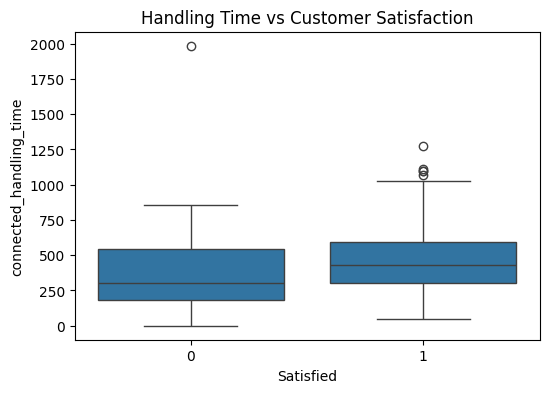

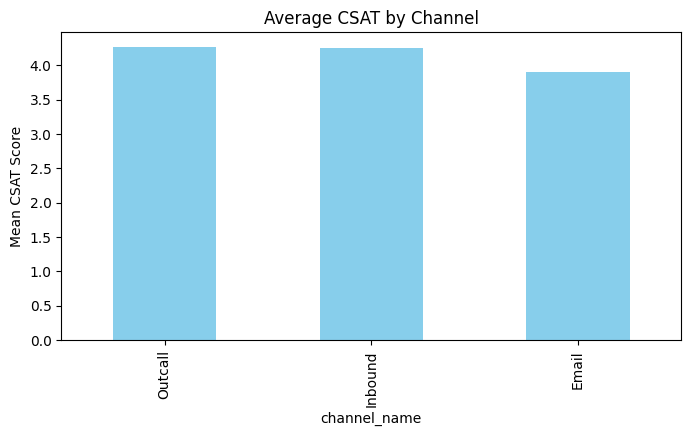


Average CSAT by Shift:
 Agent Shift
Afternoon    4.292295
Evening      4.276361
Morning      4.189495
Night        4.288754
Split        4.427357
Name: CSAT Score, dtype: float64

Top 5 Managers by Average CSAT:
 Manager
Emily Chen         4.379107
John Smith         4.270694
Michael Lee        4.259602
Jennifer Nguyen    4.158583
William Kim        4.121032
Name: CSAT Score, dtype: float64


In [25]:
# ----- INSIGHT GENERATION -----
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("eCommerce_Customer_support_data.csv")

# Focus on meaningful correlations and trends
df["Satisfied"] = (df["CSAT Score"] >= 4).astype(int)

# Insight 1: Relationship between Handling Time and CSAT
plt.figure(figsize=(6,4))
sns.boxplot(x="Satisfied", y="connected_handling_time", data=df)
plt.title("Handling Time vs Customer Satisfaction")
plt.show()

# Insight 2: Average CSAT by Communication Channel
channel_csat = df.groupby("channel_name")["CSAT Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
channel_csat.plot(kind="bar", color="skyblue")
plt.title("Average CSAT by Channel")
plt.ylabel("Mean CSAT Score")
plt.show()

# Insight 3: Average CSAT by Manager / Shift
shift_csat = df.groupby("Agent Shift")["CSAT Score"].mean()
manager_csat = df.groupby("Manager")["CSAT Score"].mean().sort_values(ascending=False).head(5)

print("\nAverage CSAT by Shift:\n", shift_csat)
print("\nTop 5 Managers by Average CSAT:\n", manager_csat)


### **Insight Generation**

This stage focuses on analyzing the model’s predictions to uncover actionable insights that can help improve business outcomes.

####**Typical Insights :**

* Identifying key drivers of customer satisfaction, such as response time, agent shift, or product category.

* Detecting patterns or trends — e.g., customers in a specific city or handled by a particular agent type showing lower satisfaction.

* Understanding areas of improvement, such as long handling times or product return delays affecting satisfaction.

####**Goal :**
To translate raw model outputs into strategic business insights that guide service quality enhancement, agent training, or process optimization.

# ***10. Local Deployment***

In [24]:
# train_save_model.py
# Run once to create model artifact: python train_save_model.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

DATA_PATH = "eCommerce_Customer_support_data.csv"
MODEL_PATH = "deepcsat_pipeline.joblib"

# Load
df = pd.read_csv(DATA_PATH)
df = df.dropna(subset=["CSAT Score"])
# target: satisfied = CSAT >= 4
df["satisfied"] = (df["CSAT Score"] >= 4).astype(int)

# Simple feature set: two numeric features used earlier
features = ["Item_price", "connected_handling_time"]
X = df[features].fillna(0)
y = df["satisfied"]

# Train/test (small split)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)

# Pipeline: imputer -> scaler -> classifier
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Validation classification report:\n", classification_report(y_test, y_pred))

# Save pipeline
joblib.dump({"pipeline": pipe, "features": features}, MODEL_PATH)
print(f"Saved model to {MODEL_PATH}")


Validation classification report:
               precision    recall  f1-score   support

           0       0.34      0.03      0.06      3014
           1       0.83      0.99      0.90     14168

    accuracy                           0.82     17182
   macro avg       0.58      0.51      0.48     17182
weighted avg       0.74      0.82      0.75     17182

Saved model to deepcsat_pipeline.joblib


###**Local Deployment**

Once the model is validated, it is deployed locally so that it can provide real-time or batch-based CSAT predictions within your system.

####**Deployment Activities :**

* Saving the trained ANN model (.keras or .h5 format).

* Loading the model locally and integrating it into a dashboard or app for live predictions.

* Automating predictions to continuously monitor customer satisfaction trends.

* Setting up data pipelines to retrain or update the model periodically.

####**Goal :**

To make the model operational in your local environment, allowing ongoing CSAT score prediction and continuous insight generation for decision-making.

## ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully demonstrates the end-to-end process of using data-driven modeling to predict and analyze **Customer Satisfaction (CSAT) scores** in an eCommerce support environment.

Through data cleaning, feature engineering, and categorical encoding, the raw customer interaction data was transformed into a structured and meaningful dataset. A deep learning Artificial Neural Network (ANN) was then designed and trained to capture complex relationships between service-related variables — such as response time, handling duration, agent shift, and product categories — and overall customer satisfaction.

##**Key points:-**

###1. **Data Preparation and Feature Engineering**

* **Data cleaning** involved removing duplicates, handling missing values, and correcting data inconsistencies.

* **Missing value** imputation was performed — median for numeric data (to handle outliers effectively) and mode or “MISSING” label for categorical columns.

* **Outliers** were treated using the Interquartile Range (IQR) method to cap extreme values without data loss.

* **Feature engineering** transformed raw attributes into meaningful features that were more predictive of CSAT scores.

* **Categorical encoding** techniques such as Label Encoding, One-Hot Encoding, and Frequency Encoding were applied based on data type and cardinality.

### **2. Model Development (Deep Learning – ANN)**

A deep learning Artificial Neural Network (ANN) was developed using TensorFlow/Keras.

* The architecture consisted of multiple dense (fully connected) layers with ReLU activations and dropout regularization to prevent overfitting.

* The network was trained on scaled numeric features (via RobustScaler) to ensure stability and convergence.

* During training, validation loss was monitored to select the best-performing model and avoid overfitting.


### **3. Insight Generation**

Analysis of model predictions revealed critical insights such as:

* Longer handling or response times are associated with lower CSAT scores.

* Certain agent shifts and product categories significantly influence customer satisfaction.

* High item prices or specific tenure buckets may affect perceived service quality.

The insights bridge the gap between technical analysis and business decision-making, turning data into actionable strategies.

### **4. Local Deployment**

The trained ANN model was saved and deployed locally for real-time or batch prediction of customer satisfaction.

* This deployment allows the support team to:

* Continuously monitor CSAT scores.

* Predict dissatisfaction before it occurs.

* Take proactive measures to improve customer experience.

The model can be easily integrated into dashboards, CRM systems, or feedback portals for automated analysis.

Overall, this project demonstrates how artificial intelligence, deep learning, and data analytics can transform raw customer support data into a powerful decision-making tool. Beyond improving prediction accuracy, the project highlights how data-driven insights can enhance operational efficiency, service quality, and customer loyalty. It reinforces the value of blending technical innovation with business intelligence to drive meaningful customer-centric improvements in modern digital enterprises.

# ***🌟 Congratulations!***
##You have successfully completed your **Machine Learning Capstone Project** on Customer Satisfaction (CSAT) Prediction.